kaggle: https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil

NULL values are now replaces with -99999

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#Abrindo a base de dados .csv
df_base= pd.read_csv('base_2004_2021.csv')

#Realizando uma rápida observação dos dados
df_base.head(10)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
5,2004-05-09,2004-05-15,NORDESTE,BAHIA,ETANOL HIDRATADO,408,R$/l,1.383,0.132,0.999,2.050,0.426,0.095,0.957,0.128,0.5686,1.35,0.134
6,2004-05-09,2004-05-15,NORDESTE,CEARA,ETANOL HIDRATADO,278,R$/l,1.453,0.218,1.030,1.950,0.353,0.150,1.1,0.068,0.7332,1.294,0.062
7,2004-05-09,2004-05-15,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,R$/l,1.631,0.158,1.350,2.000,0.515,0.097,1.116,0.091,0.9923,1.36183,0.082
8,2004-05-09,2004-05-15,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,R$/l,1.284,0.130,1.100,1.699,0.353,0.101,0.931,0.072,0.7577,1.2972,0.077
9,2004-05-09,2004-05-15,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,423,R$/l,1.224,0.141,0.989,1.700,0.277,0.115,0.947,0.091,0.5643,1.3541,0.096


Não foi possível visualizar em df.head() se o dataset possui células vazias ("NaN"). Para isto, iremos utilizar o comando isnull() e somar por coluna.

In [17]:
#Verificando o tamanho do nosso dataset
df_base.shape

(120823, 18)

In [18]:
#Verificando as colunas existentes no dataset
df_base.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'],
      dtype='object')

In [19]:
#Analisando os tipos de variáveis das colunas
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

Todas as colunas não possuem valores nulos. Analisando a data, seria interessante trabalhar com o dia, mês e ano em colunas separadas para facilitar a análise.

In [20]:
#Novas colunas com o dia, mês e ano baseadas na coluna "DATA INICIAL" e "DATA FINAL"

dia_inicial=pd.DatetimeIndex(df_base['DATA INICIAL']).day
dia_final=pd.DatetimeIndex(df_base['DATA FINAL']).day

mes_inicial=pd.DatetimeIndex(df_base['DATA INICIAL']).month
mes_final=pd.DatetimeIndex(df_base['DATA FINAL']).month

ano_inicial=pd.DatetimeIndex(df_base['DATA INICIAL']).year
ano_final=pd.DatetimeIndex(df_base['DATA FINAL']).year

#Adicionando as colunas no DataFrame
df_base=df_base.assign(dia_inicial=dia_inicial, mes_inicial=mes_inicial, ano_inicial=ano_inicial, dia_final=dia_final, mes_final=mes_final, ano_final=ano_final)

#Visualizando o dataset modificado
df_base.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,...,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,dia_inicial,mes_inicial,ano_inicial,dia_final,mes_final,ano_final
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,...,0.11,0.4201,0.9666,0.133,9,5,2004,15,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,...,0.088,0.5013,1.05,0.115,9,5,2004,15,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,...,0.095,0.5614,1.161,0.098,9,5,2004,15,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,...,0.119,0.5991,1.22242,0.143,9,5,2004,15,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,...,0.077,0.7441,1.0317,0.082,9,5,2004,15,5,2004


In [29]:
#Convertendo para numérico (float neste caso) e coagindo quando necessário 
df_base["MARGEM MÉDIA REVENDA"]=pd.to_numeric(df_base["MARGEM MÉDIA REVENDA"],errors='coerce')
df_base["PREÇO MÉDIO DISTRIBUIÇÃO"]=pd.to_numeric(df_base["PREÇO MÉDIO DISTRIBUIÇÃO"],errors='coerce')
df_base["DESVIO PADRÃO DISTRIBUIÇÃO"]=pd.to_numeric(df_base["DESVIO PADRÃO DISTRIBUIÇÃO"],errors='coerce')
df_base["PREÇO MÍNIMO DISTRIBUIÇÃO"]=pd.to_numeric(df_base["PREÇO MÍNIMO DISTRIBUIÇÃO"],errors='coerce')
df_base["PREÇO MÁXIMO DISTRIBUIÇÃO"]=pd.to_numeric(df_base["PREÇO MÁXIMO DISTRIBUIÇÃO"],errors='coerce')
df_base["COEF DE VARIAÇÃO DISTRIBUIÇÃO"]=pd.to_numeric(df_base["COEF DE VARIAÇÃO DISTRIBUIÇÃO"],errors='coerce')

A partir daqui

In [30]:
df_base.tail()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,...,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,dia_inicial,mes_inicial,ano_inicial,dia_final,mes_final,ano_final
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,...,-99999.0,-99999.0,-99999.0,-99999.0,25,4,2021,1,5,2021
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,...,-99999.0,-99999.0,-99999.0,-99999.0,25,4,2021,1,5,2021
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,...,-99999.0,-99999.0,-99999.0,-99999.0,25,4,2021,1,5,2021
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,...,-99999.0,-99999.0,-99999.0,-99999.0,25,4,2021,1,5,2021
120822,2021-04-25,2021-05-01,NORTE,TOCANTINS,OLEO DIESEL S10,18,R$/l,4.352,0.156,4.199,...,-99999.0,-99999.0,-99999.0,-99999.0,25,4,2021,1,5,2021


In [31]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           117392 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA      

In [33]:
df_base.isnull().sum()

DATA INICIAL                        0
DATA FINAL                          0
REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             3431
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         3400
DESVIO PADRÃO DISTRIBUIÇÃO       3400
PREÇO MÍNIMO DISTRIBUIÇÃO        3400
PREÇO MÁXIMO DISTRIBUIÇÃO        3400
COEF DE VARIAÇÃO DISTRIBUIÇÃO    3400
dia_inicial                         0
mes_inicial                         0
ano_inicial                         0
dia_final                           0
mes_final                           0
ano_final                           0
dtype: int64

In [40]:
df_base[df_base['MARGEM MÉDIA REVENDA'].isnull()]

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,...,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,dia_inicial,mes_inicial,ano_inicial,dia_final,mes_final,ano_final
1903,2005-09-25,2005-10-01,NORTE,PARA,ETANOL HIDRATADO,2,R$/l,1.694,0.283,1.690,...,NaN,NaN,NaN,NaN,25,9,2005,1,10,2005
1958,2005-10-09,2005-10-15,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.000,0.000,2.000,...,NaN,NaN,NaN,NaN,9,10,2005,15,10,2005
2012,2005-10-23,2005-10-29,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.277,0.023,2.250,...,NaN,NaN,NaN,NaN,23,10,2005,29,10,2005
2497,2006-02-26,2006-03-04,NORTE,RORAIMA,ETANOL HIDRATADO,11,R$/l,2.182,0.040,2.100,...,NaN,NaN,NaN,NaN,26,2,2006,4,3,2006
3199,2006-08-27,2006-09-02,NORTE,RORAIMA,ETANOL HIDRATADO,22,R$/l,2.285,0.068,1.980,...,NaN,NaN,NaN,NaN,27,8,2006,2,9,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106664,2019-06-16,2019-06-22,SUDESTE,MINAS GERAIS,GNV,5,R$/m3,3.445,0.147,3.347,...,NaN,NaN,NaN,NaN,16,6,2019,22,6,2019
106666,2019-06-16,2019-06-22,SUL,PARANA,GNV,7,R$/m3,3.132,0.295,3.049,...,NaN,NaN,NaN,NaN,16,6,2019,22,6,2019
106811,2019-06-23,2019-06-29,SUDESTE,ESPIRITO SANTO,GNV,4,R$/m3,3.299,0.005,3.290,...,NaN,NaN,NaN,NaN,23,6,2019,29,6,2019
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.100,3.495,...,NaN,NaN,NaN,NaN,23,6,2019,29,6,2019


In [66]:
verificar_nulos = df_base[df_base['MARGEM MÉDIA REVENDA'].isnull()]
verificar_nulos.shape

(3431, 24)

In [67]:
# Os 3400 valores nulos do Preço Médio Distribuição estão contidos na Margem Média Revenda:
verificar_nulos[verificar_nulos['PREÇO MÉDIO DISTRIBUIÇÃO'].isnull()]

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,...,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,dia_inicial,mes_inicial,ano_inicial,dia_final,mes_final,ano_final
1903,2005-09-25,2005-10-01,NORTE,PARA,ETANOL HIDRATADO,2,R$/l,1.694,0.283,1.690,...,NaN,NaN,NaN,NaN,25,9,2005,1,10,2005
1958,2005-10-09,2005-10-15,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.000,0.000,2.000,...,NaN,NaN,NaN,NaN,9,10,2005,15,10,2005
2012,2005-10-23,2005-10-29,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.277,0.023,2.250,...,NaN,NaN,NaN,NaN,23,10,2005,29,10,2005
2497,2006-02-26,2006-03-04,NORTE,RORAIMA,ETANOL HIDRATADO,11,R$/l,2.182,0.040,2.100,...,NaN,NaN,NaN,NaN,26,2,2006,4,3,2006
3199,2006-08-27,2006-09-02,NORTE,RORAIMA,ETANOL HIDRATADO,22,R$/l,2.285,0.068,1.980,...,NaN,NaN,NaN,NaN,27,8,2006,2,9,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106664,2019-06-16,2019-06-22,SUDESTE,MINAS GERAIS,GNV,5,R$/m3,3.445,0.147,3.347,...,NaN,NaN,NaN,NaN,16,6,2019,22,6,2019
106666,2019-06-16,2019-06-22,SUL,PARANA,GNV,7,R$/m3,3.132,0.295,3.049,...,NaN,NaN,NaN,NaN,16,6,2019,22,6,2019
106811,2019-06-23,2019-06-29,SUDESTE,ESPIRITO SANTO,GNV,4,R$/m3,3.299,0.005,3.290,...,NaN,NaN,NaN,NaN,23,6,2019,29,6,2019
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.100,3.495,...,NaN,NaN,NaN,NaN,23,6,2019,29,6,2019


In [68]:
# 2.8% da base
3400/df_base.shape[0]

0.028140337518518826

O que fazer com os novos dados nulos? Os antigos são representados por -99999

In [76]:
df_base.describe()

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,dia_inicial,mes_inicial,ano_inicial,dia_final,mes_final,ano_final
count,120823.000000,120823.000000,120823.000000,120823.000000,120823.000000,117392.000000,120823.000000,117423.000000,117423.000000,117423.000000,117423.000000,117423.000000,120823.000000,120823.000000,120823.00000,120823.000000,120823.000000,120823.000000
mean,221.066461,11.473440,0.684132,9.977821,13.233902,-4697.376395,0.045298,-4682.188208,-4690.133173,-4683.305792,-4680.965828,-4690.642465,15.713829,6.468876,2012.74355,15.717123,6.469927,2012.759880
std,387.940239,19.161823,1.403317,16.433783,22.451445,21163.482182,0.024763,21145.807211,21144.040032,21145.558085,21146.080075,21143.927009,8.806543,3.475266,4.88562,8.799908,3.472910,4.887389
min,1.000000,0.766000,0.000000,0.590000,0.999000,-99999.000000,0.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,1.000000,1.000000,2004.00000,1.000000,1.000000,2004.000000
25%,39.000000,2.157000,0.075000,1.989000,2.420000,0.272000,0.029000,1.757000,0.044000,1.638000,1.900250,0.019000,8.000000,3.000000,2009.00000,8.000000,3.000000,2009.000000
50%,99.000000,2.899000,0.121000,2.690000,3.200000,0.381000,0.041000,2.359000,0.076000,2.238000,2.537600,0.029000,16.000000,6.000000,2013.00000,16.000000,6.000000,2013.000000
75%,226.000000,4.026000,0.204000,3.790000,4.589000,0.554000,0.058000,3.364000,0.148000,3.199050,3.575750,0.058000,23.000000,10.000000,2017.00000,23.000000,10.000000,2017.000000
max,4167.000000,107.500000,10.748000,100.000000,120.000000,36.847000,0.395000,83.137000,18.385000,83.000000,94.500000,0.780000,31.000000,12.000000,2021.00000,31.000000,12.000000,2021.000000


Colunas com dados nulos: 

- MARGEM MÉDIA REVENDA, 
- PREÇO MÉDIO DISTRIBUIÇÃO, 
- DESVIO PADRÃO DISTRIBUIÇÃO, 
- PREÇO MÍNIMO DISTRIBUIÇÃO, 
- PREÇO MÁXIMO DISTRIBUIÇÃO, 
- COEF DE VARIAÇÃO DISTRIBUIÇÃO

In [94]:
print(f"Valores Nulos 'MARGEM MÉDIA REVENDA': {df_base['MARGEM MÉDIA REVENDA'].loc[df_base['MARGEM MÉDIA REVENDA'] == -99999].count()}")
print(f"Valores Nulos PREÇO MÉDIO DISTRIBUIÇÃO: {df_base['PREÇO MÉDIO DISTRIBUIÇÃO'].loc[df_base['PREÇO MÉDIO DISTRIBUIÇÃO'] == -99999].count()}")
print(f"Valores Nulos DESVIO PADRÃO DISTRIBUIÇÃO: {df_base['DESVIO PADRÃO DISTRIBUIÇÃO'].loc[df_base['DESVIO PADRÃO DISTRIBUIÇÃO'] == -99999].count()}")
print(f"Valores Nulos PREÇO MÍNIMO DISTRIBUIÇÃO: {df_base['PREÇO MÍNIMO DISTRIBUIÇÃO'].loc[df_base['PREÇO MÍNIMO DISTRIBUIÇÃO'] == -99999].count()}")
print(f"Valores Nulos PREÇO MÁXIMO DISTRIBUIÇÃO: {df_base['PREÇO MÁXIMO DISTRIBUIÇÃO'].loc[df_base['PREÇO MÁXIMO DISTRIBUIÇÃO'] == -99999].count()}")
print(f"Valores Nulos COEF DE VARIAÇÃO DISTRIBUIÇÃO: {df_base['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].loc[df_base['COEF DE VARIAÇÃO DISTRIBUIÇÃO'] == -99999].count()}")

Valores Nulos 'MARGEM MÉDIA REVENDA': 5517
Valores Nulos PREÇO MÉDIO DISTRIBUIÇÃO: 5508
Valores Nulos DESVIO PADRÃO DISTRIBUIÇÃO: 5508
Valores Nulos PREÇO MÍNIMO DISTRIBUIÇÃO: 5508
Valores Nulos PREÇO MÁXIMO DISTRIBUIÇÃO: 5508
Valores Nulos COEF DE VARIAÇÃO DISTRIBUIÇÃO: 5508


In [97]:
# 7% da base de dados nulos + com valor -:
(3400+5517)/df_base.shape[0]

0.07380217342724481

In [110]:
df_base['ESTADO'].value_counts()

PARAIBA                4819
RIO DE JANEIRO         4819
SAO PAULO              4819
RIO GRANDE DO SUL      4819
BAHIA                  4819
SANTA CATARINA         4818
RIO GRANDE DO NORTE    4818
MINAS GERAIS           4817
ESPIRITO SANTO         4815
PERNAMBUCO             4813
CEARA                  4813
PARANA                 4807
ALAGOAS                4806
SERGIPE                4795
MATO GROSSO DO SUL     4793
MATO GROSSO            4566
AMAZONAS               4414
GOIAS                  4134
PIAUI                  4017
MARANHAO               3971
DISTRITO FEDERAL       3956
PARA                   3955
TOCANTINS              3953
RONDONIA               3950
ACRE                   3948
RORAIMA                3938
AMAPA                  3831
Name: ESTADO, dtype: int64

In [102]:
# Verificar se os valores nulos estão concentrados em algum estado:
df_base['ESTADO'].loc[df_base['MARGEM MÉDIA REVENDA'] == -99999].value_counts()

RIO GRANDE DO NORTE    248
PARANA                 243
MINAS GERAIS           240
AMAZONAS               230
PERNAMBUCO             229
PARAIBA                229
MATO GROSSO            229
SANTA CATARINA         226
ESPIRITO SANTO         219
CEARA                  217
RIO GRANDE DO SUL      216
MATO GROSSO DO SUL     214
SERGIPE                207
ACRE                   202
SAO PAULO              202
ALAGOAS                202
AMAPA                  201
BAHIA                  197
RIO DE JANEIRO         196
DISTRITO FEDERAL       183
PIAUI                  179
MARANHAO               171
RONDONIA               171
GOIAS                  171
TOCANTINS              170
RORAIMA                167
PARA                   158
Name: ESTADO, dtype: int64

<Axes: xlabel='count', ylabel='ESTADO'>

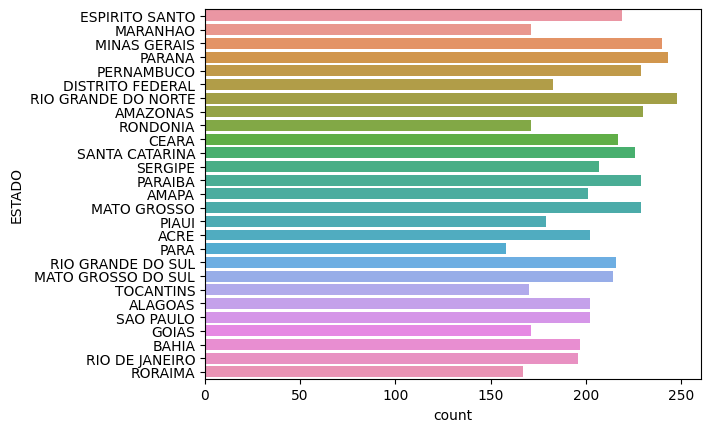

In [119]:
sns.countplot(data=df_base, y=df_base['ESTADO'].loc[df_base['MARGEM MÉDIA REVENDA'] == -99999])

In [107]:
# Verificar se os valores nulos estão concentrados em algum estado:
df_base['ESTADO'].loc[df_base['MARGEM MÉDIA REVENDA'].isnull()].value_counts()

AMAPA                  407
PARANA                 349
MATO GROSSO            334
CEARA                  299
RIO GRANDE DO NORTE    263
ALAGOAS                230
GOIAS                  214
ESPIRITO SANTO         181
AMAZONAS               176
MATO GROSSO DO SUL     170
DISTRITO FEDERAL       166
PIAUI                  154
MINAS GERAIS           119
SANTA CATARINA          98
SERGIPE                 57
RONDONIA                38
TOCANTINS               30
MARANHAO                29
PERNAMBUCO              26
PARAIBA                 23
PARA                    20
ACRE                    17
RIO GRANDE DO SUL       14
RORAIMA                 14
SAO PAULO                2
RIO DE JANEIRO           1
Name: ESTADO, dtype: int64

<Axes: xlabel='count', ylabel='ESTADO'>

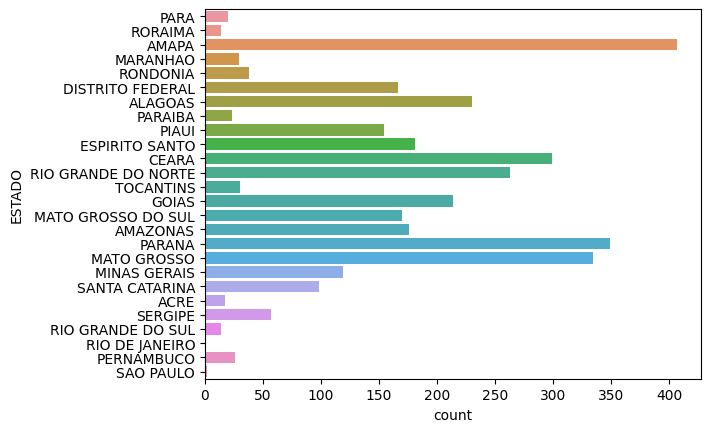

In [118]:
sns.countplot(data=df_base, y=df_base['ESTADO'].loc[df_base['MARGEM MÉDIA REVENDA'].isnull()] )

<Axes: xlabel='ano_final', ylabel='PREÇO MÉDIO REVENDA'>

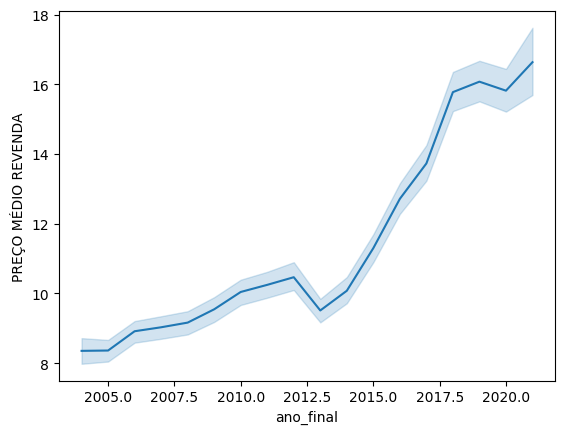

In [132]:
sns.lineplot(data=df_base, x="ano_final", y="PREÇO MÉDIO REVENDA")

<Axes: xlabel='mes_final', ylabel='PREÇO MÉDIO REVENDA'>

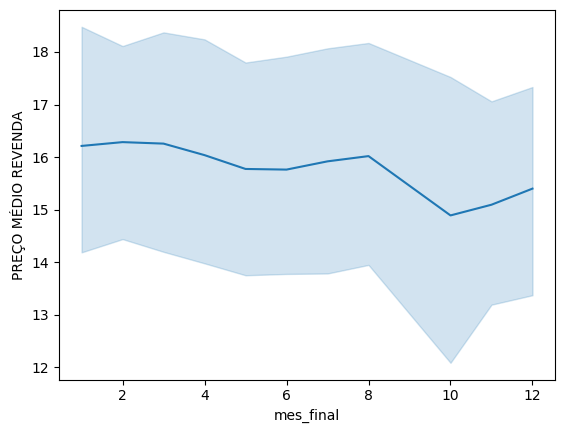

In [143]:
sns.lineplot(data=df_base[df_base['ano_final']==2020], x="mes_final", y="PREÇO MÉDIO REVENDA")

<Axes: xlabel='mes_final', ylabel='PREÇO MÉDIO REVENDA'>

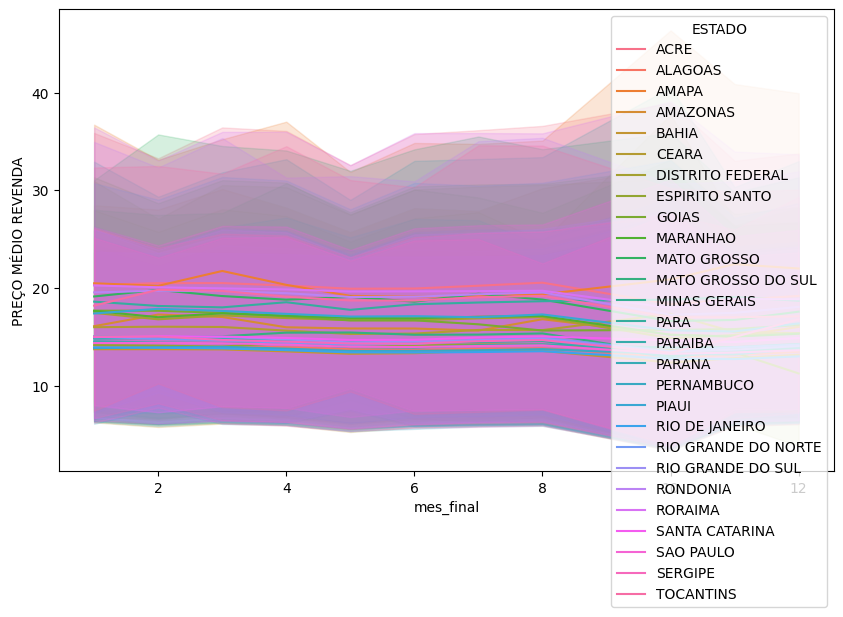

In [155]:
plt.figure(figsize=(10, 6)) 
sns.lineplot(data=df_base[df_base['ano_final']==2020], x="mes_final", y="PREÇO MÉDIO REVENDA", hue='ESTADO')

<Axes: xlabel='ano_final', ylabel='PREÇO MÉDIO REVENDA'>

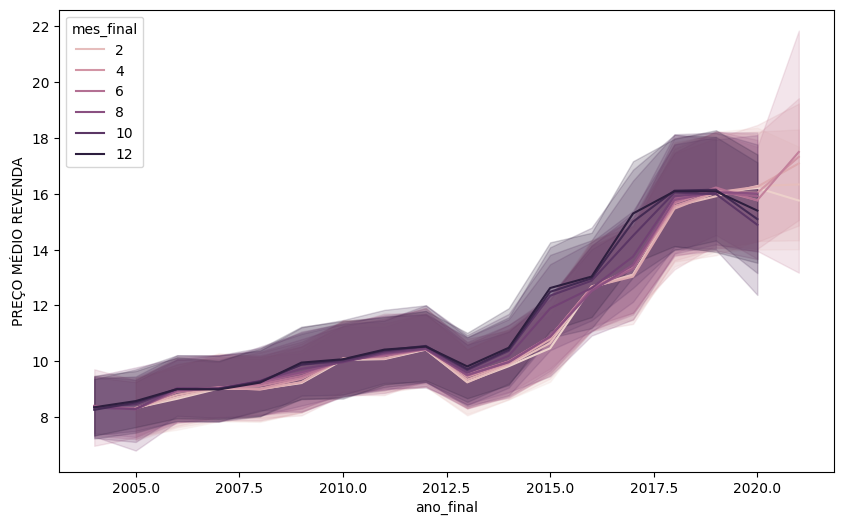

In [159]:
plt.figure(figsize=(10, 6)) 
sns.lineplot(data=df_base, x="ano_final", y="PREÇO MÉDIO REVENDA", hue='mes_final')